In [ ]:
pip install transformers

In [ ]:
# import library
import pandas as pd
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# load model from Hugging Face
model_path = "azizp128/prediksi-emosi-indobert"

# load model
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

In [ ]:
# create pipeline
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

Device set to use cuda:0


In [ ]:
# import data
data = pd.read_csv("/content/drive/MyDrive/GMaps_Review_Cleaned.csv")
data.head()

,Wisatawan Lokal,Review,Nama Tempat
0,True,hidden gem,Goa Gong Pacitan
1,True,goa yang sangat menarik wajib dikunjungi untuk...,Goa Gong Pacitan
2,True,hosjosssss,Goa Gong Pacitan
3,True,resik resik tour gaetnya ramah istimewa,Goa Gong Pacitan
4,True,cool,Goa Gong Pacitan


In [ ]:
# convert to string
data['Review'] = data['Review'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Wisatawan Lokal  4419 non-null   bool  
 1   Review           4419 non-null   object
 2   Nama Tempat      4419 non-null   object
dtypes: bool(1), object(2)
memory usage: 73.5+ KB


In [ ]:
# labelling function
def classification(text):
  label_index = {'SEDIH': 'SEDIH', 'MARAH': 'MARAH', 'CINTA': 'CINTA', 'TAKUT': 'TAKUT', 'SENANG': 'SENANG', 'JIJIK': 'JIJIK'}
  results = pipe(text)
  labels = []
  for result in results:
    labels.append(label_index[result['label']])
  return labels

In [ ]:
# apply
data['labels'] = data['Review'].apply(classification)

In [ ]:
data['labels'] = data['labels'].astype(str)

In [ ]:
data['labels']= data['labels'].str.replace(r"[\[\]']", '', regex=True)

In [ ]:
data

,Wisatawan Lokal,Review,Nama Tempat,labels
0,True,hidden gem,Goa Gong Pacitan,SEDIH
1,True,goa yang sangat menarik wajib dikunjungi untuk...,Goa Gong Pacitan,SENANG
2,True,hosjosssss,Goa Gong Pacitan,SENANG
3,True,resik resik tour gaetnya ramah istimewa,Goa Gong Pacitan,SENANG
4,True,cool,Goa Gong Pacitan,SENANG
...,...,...,...,...
4414,True,menyusuri sungai maron,Sungai Maron Pacitan,SENANG
4415,False,bagus,Sungai Maron Pacitan,SENANG
4416,False,sangat bagus tetapi tidak puas terlalu terburu...,Sungai Maron Pacitan,SEDIH
4417,True,hening syahdu,Sungai Maron Pacitan,SEDIH


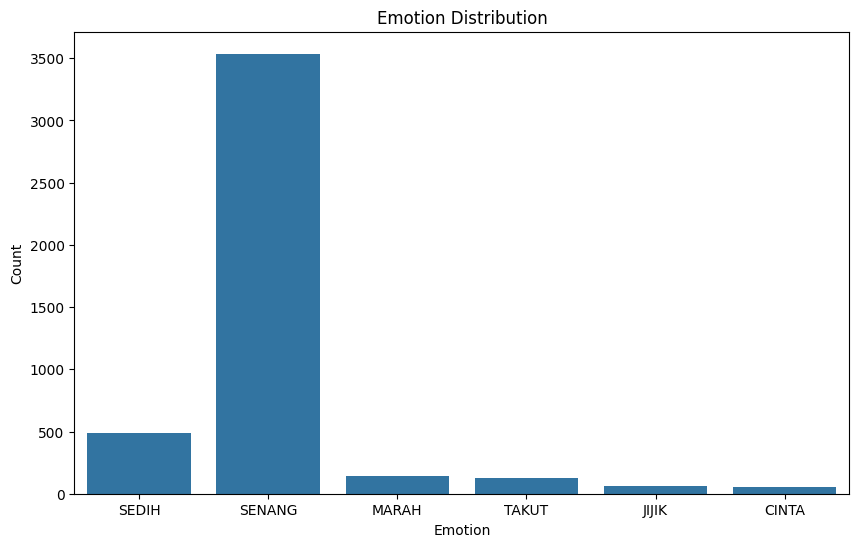

In [ ]:
# sentiment plot / graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='labels', data=data)
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

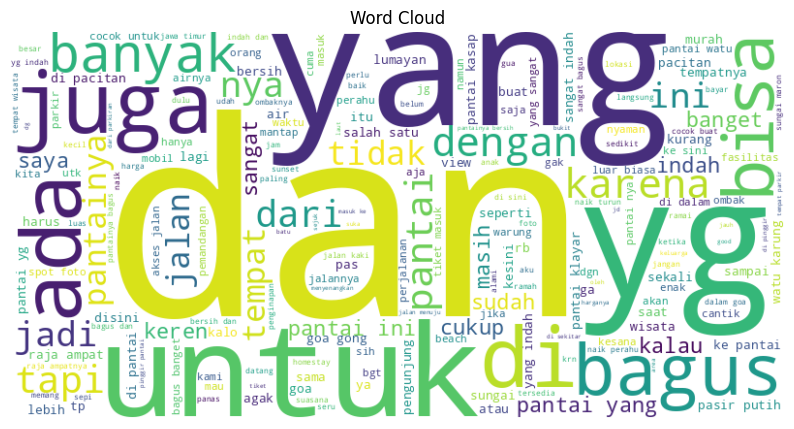

In [ ]:
# wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Review']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [ ]:
# save data
data.to_csv('GMaps_Review_Classified.csv', index=False)
data.to_excel('GMaps_Review_Classified.xlsx', index=False)